In [1]:
from datasets import load_dataset

dataset = load_dataset("keremberke/chest-xray-classification", name="full")

c:\Users\moric\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2 as cv


In [3]:
class_labels = [
    "NORMAL",
    "PNEUMONIA"
    ]

In [4]:
for i in class_labels:
  print(i)

print(len(class_labels))

NORMAL
PNEUMONIA
2


In [5]:
image_train = []
for i in dataset["train"]["image"]:
  image_train.append(cv.resize(np.asarray(i), (100, 100)))

image_train = np.asanyarray(image_train)


label_train = np.asanyarray(dataset["train"]["labels"])


image_test = []
for i in dataset["test"]["image"]:
  image_test.append(cv.resize(np.asarray(i), (100, 100)))

image_test = np.asanyarray(image_test)

label_test = np.asanyarray(dataset["test"]["labels"])

print(len(image_train))
print(type(image_train))
print(type(image_test))
print(type(label_train))
print(type(label_test))

4077
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print(label_train)

[0 0 0 ... 1 1 1]


In [7]:
print(image_train, label_train)
print(image_test, label_test)
image_train.shape, image_test.shape

[[[[ 35  35  35]
   [ 29  29  29]
   [ 53  53  53]
   ...
   [125 125 125]
   [121 121 121]
   [110 110 110]]

  [[ 38  38  38]
   [ 28  28  28]
   [ 43  43  43]
   ...
   [130 130 130]
   [119 119 119]
   [108 108 108]]

  [[ 36  36  36]
   [ 29  29  29]
   [ 32  32  32]
   ...
   [126 126 126]
   [119 119 119]
   [103 103 103]]

  ...

  [[ 39  39  39]
   [ 40  40  40]
   [ 41  41  41]
   ...
   [ 32  32  32]
   [ 33  33  33]
   [ 31  31  31]]

  [[ 40  40  40]
   [ 40  40  40]
   [ 42  42  42]
   ...
   [ 32  32  32]
   [ 31  31  31]
   [ 30  30  30]]

  [[ 39  39  39]
   [ 41  41  41]
   [ 40  40  40]
   ...
   [ 31  31  31]
   [ 33  33  33]
   [ 30  30  30]]]


 [[[ 73  73  73]
   [ 75  75  75]
   [ 77  77  77]
   ...
   [116 116 116]
   [130 130 130]
   [166 166 166]]

  [[ 79  79  79]
   [ 82  82  82]
   [ 83  83  83]
   ...
   [115 115 115]
   [134 134 134]
   [167 167 167]]

  [[ 85  85  85]
   [ 81  81  81]
   [ 81  81  81]
   ...
   [117 117 117]
   [138 138 138]
   [166 166

((4077, 100, 100, 3), (582, 100, 100, 3))

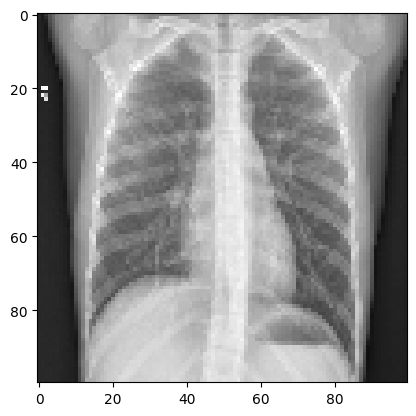

[[[ 35  35  35]
  [ 29  29  29]
  [ 53  53  53]
  ...
  [125 125 125]
  [121 121 121]
  [110 110 110]]

 [[ 38  38  38]
  [ 28  28  28]
  [ 43  43  43]
  ...
  [130 130 130]
  [119 119 119]
  [108 108 108]]

 [[ 36  36  36]
  [ 29  29  29]
  [ 32  32  32]
  ...
  [126 126 126]
  [119 119 119]
  [103 103 103]]

 ...

 [[ 39  39  39]
  [ 40  40  40]
  [ 41  41  41]
  ...
  [ 32  32  32]
  [ 33  33  33]
  [ 31  31  31]]

 [[ 40  40  40]
  [ 40  40  40]
  [ 42  42  42]
  ...
  [ 32  32  32]
  [ 31  31  31]
  [ 30  30  30]]

 [[ 39  39  39]
  [ 41  41  41]
  [ 40  40  40]
  ...
  [ 31  31  31]
  [ 33  33  33]
  [ 30  30  30]]]
Class no: 0


In [8]:
num = 0

plt.figure()
plt.imshow(image_train[num])
plt.show()
print(image_train[num])
print("Class no: {0}".format(label_train[num]))

In [9]:
image_train.shape

(4077, 100, 100, 3)

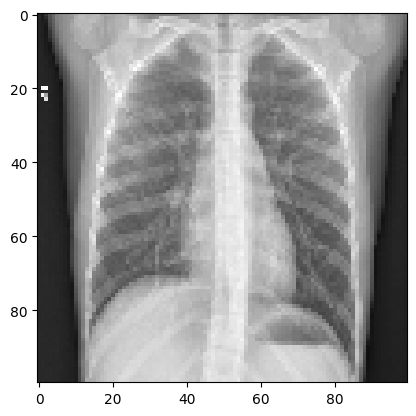

In [10]:
plt.imshow(image_train[0])
plt.show()

In [11]:
# Normalization

image_train = image_train / 255.0
image_test = image_test / 255.0


In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2)
])

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

In [30]:
model.fit(image_train, label_train, epochs=30)

Epoch 1/30
128/128 [==============================] - 1s 5ms/step - loss: 0.7348 - accuracy: 0.8251
Epoch 2/30
128/128 [==============================] - 1s 5ms/step - loss: 0.3971 - accuracy: 0.8563
Epoch 3/30
128/128 [==============================] - 1s 5ms/step - loss: 0.2133 - accuracy: 0.9112
Epoch 4/30
128/128 [==============================] - 1s 5ms/step - loss: 0.2025 - accuracy: 0.9166
Epoch 5/30
128/128 [==============================] - 1s 5ms/step - loss: 0.1962 - accuracy: 0.9225
Epoch 6/30
128/128 [==============================] - 1s 5ms/step - loss: 0.2210 - accuracy: 0.9117
Epoch 7/30
128/128 [==============================] - 1s 5ms/step - loss: 0.2183 - accuracy: 0.9132
Epoch 8/30
128/128 [==============================] - 1s 5ms/step - loss: 0.2145 - accuracy: 0.9183
Epoch 9/30
128/128 [==============================] - 1s 5ms/step - loss: 0.1756 - accuracy: 0.9321
Epoch 10/30
128/128 [==============================] - 1s 5ms/step - loss: 0.1589 - accuracy: 0.9382

In [31]:
test_loss, test_acc = model.evaluate(image_test, label_test, verbose=2)
print('\nTest Accuracy: {} %'.format(test_acc*100))
print('\nTest Loss: ', test_loss)


19/19 - 0s - loss: 0.1893 - accuracy: 0.9416 - 190ms/epoch - 10ms/step

Test Accuracy: 94.15807723999023 %

Test Loss:  0.18925021588802338


In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               3840128   
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 2)                 258       
                                                                 
Total params: 3,856,898
Trainable params: 3,856,898
Non-trainable params: 0
_________________________________________________________________


In [33]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [34]:
predictions = probability_model.predict(image_test)
predictions[3]

19/19 [==============================] - 0s 6ms/step


array([0.6150135 , 0.38498655], dtype=float32)

In [35]:
np.argmax(predictions[3])

0

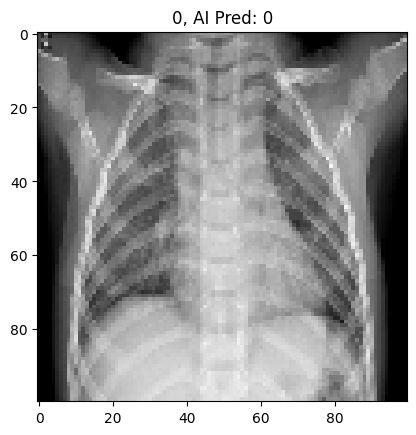

In [53]:
num =50
plt.imshow(image_test[num])
plt.title(label="{0}, AI Pred: {1}".format(label_test[num], np.argmax(predictions[num])))
plt.show()

In [54]:
import h5py

In [55]:
model.save("LUNG-AI-5.h5")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               3840128   
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 2)                 258       
                                                                 
Total params: 3,856,898
Trainable params: 3,856,898
Non-trainable params: 0
_________________________________________________________________
